Download iris dataset and usual libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns # for data visualiztions

In [2]:
iris = datasets.load_iris()
df_data = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_target = pd.DataFrame(data=iris.target, columns=["class"])


In [3]:
df_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
73,6.1,2.8,4.7,1.2
127,6.1,3.0,4.9,1.8
72,6.3,2.5,4.9,1.5
49,5.0,3.3,1.4,0.2


In [4]:
df_target.sample(5)

,class
101,2
126,2
69,1
74,1
135,2


Use GMM to separate the clusters using all 4 features: petal length & width, and sepal length & width. Map each cluster to a class by picking the most common class for each cluster (using the scipy.stats.mode() function

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(df_data)
X_scaled_array = scaler.transform(df_data)
X_scaled = pd.DataFrame(X_scaled_array, columns = df_data.columns)

X_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
25,-1.021849,-0.131979,-1.226552,-1.315444
7,-1.021849,0.788808,-1.283389,-1.315444
149,0.068662,-0.131979,0.762758,0.790671
141,1.280340,0.098217,0.762758,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [6]:
from sklearn.mixture import GaussianMixture

nclusters = 3
seed = 0

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Report value of np.sum(y_pred==y) / len(y_pred)

In [7]:
 df_target = np.array(df_target).reshape(150,)

np.sum(y_cluster_gmm==df_target) / len(y_cluster_gmm)

0.3333333333333333

Generate blobs from a new dataset, use “ from sklearn.datasets import make_blobs” . Use the following parameters:

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]), cluster_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) , random_state=0)


Plot the blobs

(array([[0.000e+00, 2.100e+01, 1.177e+03, 1.300e+01, 1.730e+02, 1.980e+02,
         3.600e+01, 1.230e+02, 1.750e+02, 7.500e+01, 9.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.030e+02, 5.400e+02,
         4.500e+02, 5.790e+02, 2.700e+01]]),
 array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
         1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 2 Lists of Patches objects>)

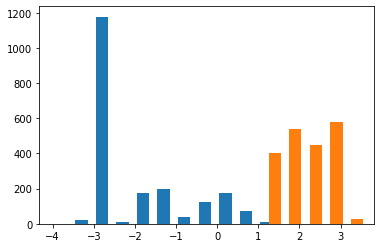

In [9]:
plt.hist(X, bins=np.arange(int(np.min(X))-1,int(np.max(X))+1,0.5), width = 0.3)

(array([  0.,   0., 400.,   0., 400.,   0., 400.,   0., 400.,   0., 400.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
         4.5]),
 <a list of 11 Patch objects>)

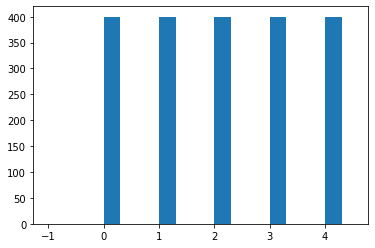

In [10]:
plt.hist(y, bins=np.arange(int(np.min(y))-1,int(np.max(y))+1,0.5), width = 0.3)

Train k-means to train on this dataset

In [11]:
from sklearn.cluster import KMeans

nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters,random_state=seed)
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([3, 1, 1, ..., 3, 3, 0], dtype=int32)

In [12]:
km.cluster_centers_

array([[-1.46332098,  2.31083369],
       [-2.80446936,  1.79959228],
       [-2.80180006,  2.79464334],
       [ 0.17864202,  2.27506362],
       [-2.80379109,  1.30017997]])

In [13]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.6553151762115746

Print the value of the centroids

In [14]:
centroids = km.cluster_centers_
print(centroids)

[[-1.46332098  2.31083369]
 [-2.80446936  1.79959228]
 [-2.80180006  2.79464334]
 [ 0.17864202  2.27506362]
 [-2.80379109  1.30017997]]


Given X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]), predict labels of new instances

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
new_cluster_kmeans = km.predict(X_new)
new_cluster_kmeans

array([3, 3, 2, 2], dtype=int32)

Plot model’s decision boundaries using data, centroids,decision boundaries. Result should be a voronoi_plot

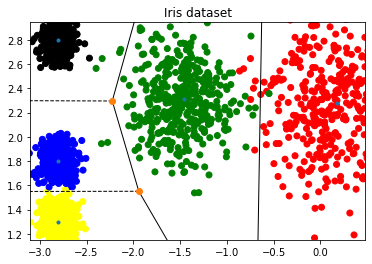

In [16]:
import matplotlib
# pyplot.contourf(X_scaled, centroids, zz, cmap='Paired')

from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(centroids)

## Draw boundaries
voronoi_plot_2d(vor)

my_colors = ["red", "green", "blue", "black", "yellow"]

## Add color to points
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=matplotlib.colors.ListedColormap(my_colors))


plt.title("Iris dataset")

## Fix my legend
#plt.legend((p,p,p), (iris.target_names))
ax = plt.gca()
legend = ax.get_legend()

plt.show()

Set values of k = 3 and k = 8, explain your results in both cases by means of the resultant intertia

In [17]:
km3 = KMeans(n_clusters=3, random_state=seed)
km3.fit(X)

km3.inertia_

646.230269055688

In [18]:
km8 = KMeans(n_clusters=8, random_state=seed)
km8.fit(X)

km8.inertia_

121.54698628667417

When the clusters is set at 3, the Inertia value is drastically higher ( 646.230269055688 ) than the Intertia value ( 121.54698628667417 ) when clusters is set at 8. This show that the data information present in the cluster decreases when the intertia decreases which leads to a performance decrease.

plot the inertia as a function of k and analyze the resulting curve, show plots, = 2 points

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

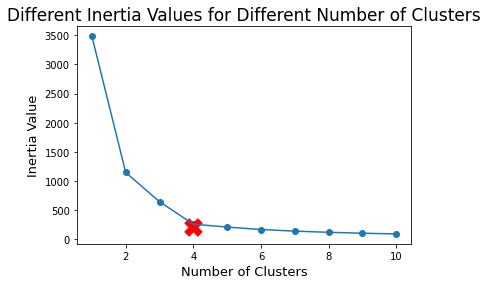

In [19]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=seed)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(4, inertia_list[4], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)


X-marker marks the elbow point. The elbow point gives the optimal number of clusters, which is four here. The data set is created such that there are four different clusters. When adding more clusters, the Inertia value decreases, but also the information contained in a cluster decreases further. Having to many clusters leads to a performance decrease and also to a not optimal clustering result.

what is the value of k at elbow? 210.90